In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,OneHotEncoder


def load_and_prepare_data(file_name, n_clusters):
    data = pd.read_csv(f'Data/{file_name}')
    numerical_data = data.iloc[:, 1:]
    

    # Step 1: Detect string columns
    string_columns = numerical_data.select_dtypes(include=[object]).columns

    # Step 2: Handle missing values by imputing
    numerical_data[string_columns] = numerical_data[string_columns].fillna('Unknown')

    numerical_data = pd.get_dummies(numerical_data, columns=string_columns)
    
    numerical_data = numerical_data.fillna(0)
    labels = data.iloc[:, 0]
    scaler = StandardScaler()
    normalized_data = scaler.fit_transform(numerical_data)
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
    clusters = kmeans.fit_predict(normalized_data)
    data['Cluster'] = clusters
    return data, normalized_data,labels


def perform_pca(normalized_data,labels, n_components):
    pca = PCA(n_components=n_components)
    pca_results = pca.fit_transform(normalized_data)
    pca_df = pd.DataFrame(data=pca_results, columns=[f'PC{i+1}' for i in range(n_components)])
    labels = pd.concat([labels,pca_df],axis=1)  # Assuming the first column contains labels

    # Save PCA-transformed data to a CSV file
    labels.to_csv(f'pca_data_{n_components}.csv', index=False)
    return pca.fit_transform(normalized_data)


def plot_2d_pca(data, pca_data, n_clusters, file_name):
    color_map = ['b', 'g', 'r', 'm', 'c', 'y', 'k', 'orange', 'pink', 'purple']
    plt.figure(figsize=(10, 8))
    for cluster in range(n_clusters):
        cluster_data = pca_data[data['Cluster'] == cluster]
        plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster}', c=color_map[cluster], s=50)
        for i, txt in enumerate(data[data['Cluster'] == cluster]['Pokemon']):
            plt.text(cluster_data[i, 0] + 0.1, cluster_data[i, 1] + 0.1, txt, fontsize=4, ha='center', va='center', color=color_map[cluster])
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title(f'Pokemon Clusters (2D PCA, {n_clusters} Clusters)')
    plt.legend()
    plt.grid(True)
    plt.savefig(f'{path}/i_2D_PCA_{n_clusters}_Clusters.png', dpi=600)


def plot_3d_pca(data, pca_data, n_clusters, file_name):
    color_map = ['b', 'g', 'r', 'm', 'c', 'y', 'k', 'orange', 'pink', 'purple']
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    for cluster in range(n_clusters):
        cluster_data = pca_data[data['Cluster'] == cluster]
        ax.scatter(cluster_data[:, 0], cluster_data[:, 1], cluster_data[:, 2], label=f'Cluster {cluster}', c=color_map[cluster], s=25)
        for i, txt in enumerate(data[data['Cluster'] == cluster]['Pokemon']):
            ax.text(cluster_data[i, 0]+ 0.1, cluster_data[i, 1]+.1, cluster_data[i, 2], txt, fontsize=4, ha='center', va='center', color=color_map[cluster])
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_zlabel('Principal Component 3')
    plt.title(f'Pokemon Clusters (3D PCA, {n_clusters} Clusters)')
    plt.legend()
    plt.grid(True)

    # Define paths for the CSV files within the base directory.

    plt.savefig(f'{path}/i_3D_v1_PCA_{n_clusters}_Clusters.png', dpi=600)
    ax.view_init(elev=30, azim=45)
    plt.savefig(f'{path}/i_3D_v2_PCA_{n_clusters}_Clusters.png', dpi=600)
    ax.view_init(elev=150, azim=15)
    plt.savefig(f'{path}/i_3D_v3_PCA_{n_clusters}_Clusters.png', dpi=600)


def save_clusters_to_markdown(data, n_clusters, file_name):
    clusters_list = data.groupby('Cluster')['Pokemon'].apply(list).reset_index()
    with open(f'{path}/t_pokemon_{n_clusters}_clusters.md', 'w') as file:
        for index, row in clusters_list.iterrows():
            file.write(f'## Cluster {row["Cluster"]}\n')
            file.write('\n'.join(f'- {pokemon}' for pokemon in row["Pokemon"]) + '\n\n')

def __main__(file_name,n_clusters):
    
    data, normalized_data,labels = load_and_prepare_data(file_name, n_clusters)
    pca_2d_data = perform_pca(normalized_data,labels, 1)
    pca_2d_data = perform_pca(normalized_data,labels, 2)
    pca_3d_data = perform_pca(normalized_data,labels, 3)
    perform_pca(normalized_data,labels, 4)
    perform_pca(normalized_data,labels, 5)
    plot_2d_pca(data, pca_2d_data, n_clusters, file_name)
    plot_3d_pca(data, pca_3d_data, n_clusters, file_name)
    save_clusters_to_markdown(data, n_clusters, file_name)

C:\Users\jaylo\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\jaylo\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\jaylo\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\jaylo\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmea

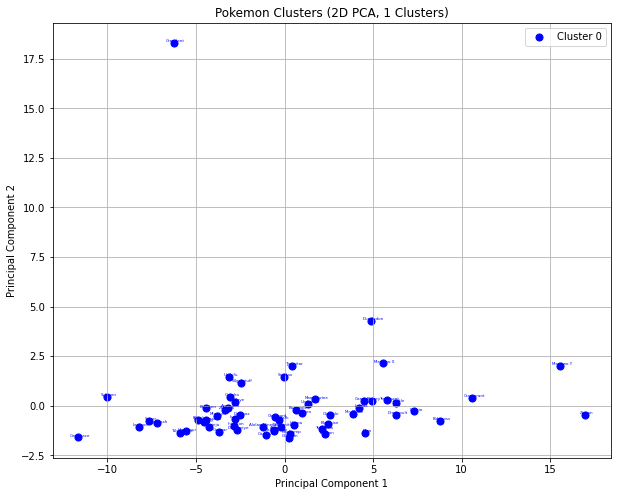

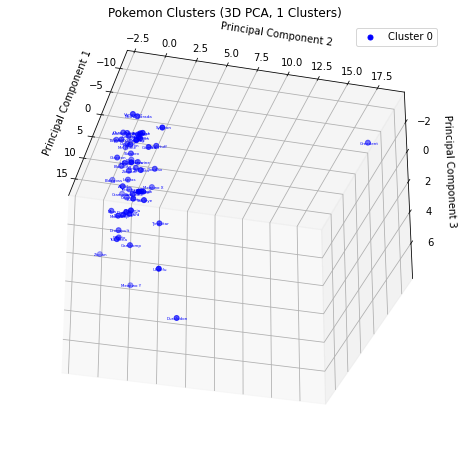

Error in callback <function flush_figures at 0x00000162358CB3A0> (for post_execute):


KeyboardInterrupt: 

In [2]:
from pathlib import Path
# Example usage:
ns = [1,2,3,4,6,7,8,9,5]
path = Path("Results/")
path.mkdir(exist_ok=True)
for n in ns:
    __main__('Pokemon_Builds_v0.csv',n)


In [1]:
import csv
def remove_empty():
    with open( 
        'Unite_API.txt', 'r') as r, open( 
            'Unite_API_post.txt', 'w') as o: 

        for line in r: 
            #strip() function 
            if line.strip(): 
                o.write(line) 

    f = open("Unite_API_post.txt", "r") 
    #print("New text file:\n",f.read())

    import csv

def process_pokemon_info(file_path):
    current_pokemon = ''
    w_builds = []
    b_builds = []
    p_builds = []
    p1 = True
    p2 = False
    p3 = False
    with open(file_path, 'r') as file:
        _ = next(file)
        for line in file:
            if p1:
                if line.strip() == "Pick rate last week":
                    p1 = False
                    p2 = True
                    continue
                pokemon = line.strip()
                _ = next(file)
                win_rate = float(next(file).strip().strip('%'))
                #print(f"{pokemon}:{win_rate}")
                w_builds.append([pokemon, win_rate])
            if p2:
                if line.strip() == "Ban rate last week":
                    p2 = False
                    p3 = True
                    continue
                pokemon = line.strip()
                _ = next(file)
                pick_rate = float(next(file).strip().strip('%'))
                print(f"{pokemon}:{pick_rate}")
                b_builds.append([pokemon, pick_rate])
            if p3:
                pokemon = line.strip()
                _ = next(file)
                ban_rate = float(next(file).strip().strip('%'))
                print(f"{pokemon}:{ban_rate}")
                p_builds.append([pokemon, ban_rate])
    builds = [w_builds,b_builds,p_builds,]
    return builds

def write_to_csv(builds, output_path):
    with open(output_path, 'w', newline='') as file:

        writer = csv.writer(file)
        writer.writerow(['Pokemon (With Moves)','Win Rate'])
        writer.writerows(builds[0])
        writer.writerows("0")
        writer.writerows(builds[1])
        writer.writerows("0")
        writer.writerows(builds[2])
        writer.writerows("0")

# Process the text file and write the output to a CSV
file_path = 'Unite_API_post.txt'
output_path = 'Pokemon_builds.csv'
remove_empty()
builds = process_pokemon_info(file_path)
write_to_csv(builds, output_path)

output_path


Umbreon:42.64
Blastoise:39.68
Trevenant:33.14
Eldegoss:31.51
Pikachu:29.33
Scizor:27.84
Espeon:27.83
Slowbro:27.2
Leafeon:27.14
Glaceon:26.74
Delphox:25.53
Mew:24.37
Decidueye:23.82
Gyarados:23.42
Meowscarada:22.22
Mimikyu:21.95
Cinderace:20.76
Blissey:20.69
Sylveon:20.6
Venusaur:19.4
Zoroark:19.36
Blaziken:19.18
Crustle:18.92
Greninja:18.78
Hoopa:18.72
Absol:17.86
Gardevoir:16.2
Lucario:16.19
Zeraora:15.55
Falinks:15.34
Talonflame:15.12
Inteleon:15.09
Aegislash:14.99
Comfey:14.88
Mamoswine:13.22
Azumarill:13.14
Dragapult:12.27
Dragonite:11.99
Alolan Ninetales:11.72
Snorlax:11.69
Machamp:11.44
Charizard:11.34
Clefable:11.33
Wigglytuff:10.24
Tsareena:9.52
Goodra:9.02
Dodrio:8.78
Buzzwole:8.74
Gengar:8.42
Mr. Mime:8.29
Chandelure:8.13
Sableye:7.65
Cramorant:7.3
Garchomp:6.81
Metagross:6.04
Tyranitar:4.85
Lapras:4.68
Urshifu:3.86
Duraludon:3.53
Greedent:2.86
Zoroark:60.74
Leafeon:46.51
Umbreon:42.42
Gyarados:35.0
Falinks:27.49
Meowscarada:24.52
Mew:17.06
Mimikyu:16.01
Buzzwole:13.76
Scizo

'Pokemon_builds.csv'

In [18]:
import csv
def remove_empty():
    with open( 
        'Unite_API_counters.txt', 'r') as r, open( 
            'Unite_API_counters_post.txt', 'w') as o: 

        for line in r: 
            #strip() function 
            if line.strip(): 
                o.write(line) 

    f = open("Unite_API_counters_post.txt", "r") 
    #print("New text file:\n",f.read())

    import csv
    
def substring_after(s, delim):
    return s.partition(delim)[2]

s0 = "Worst picks vs "
s1="Best picks vs "
s2 = "Counter for "
substring_after(s1, "world")

def process_pokemon_info(file_path):
    current_pokemon = ''
    builds = []

    with open(file_path, 'r') as file:
        first = True
        temp = []
        for line in file:
            
            if "Counter for" in line:
                _ = next(file)
                counter = substring_after(line.strip(), s2)
                #print(counter)
                win_rate = 100- float(next(file).strip().strip('%'))
                #print(win_rate)
                temp.append([counter,win_rate])
                _ = next(file)
                _ = next(file)
            if "Best" in line:
                if first:
                    temp = []
                    first = False
                else:
                    def sortSecond(val): 
                        return val[0] 
                    temp.sort(key=sortSecond)
                    return_temp = []
                    #print(temp)
                    for t in temp:
                        return_temp.append(t[1]) 
                    builds.append(return_temp)
                    temp = []
                pokemon = substring_after(line.strip(), s1)
               #temp.append(pokemon)
                print(temp)
            if "Worst" in line:
                pokemon = substring_after(line, s0)
                #print(temp)
                
                _ = next(file)
    def sortSecond(val): 
        return val[1] 
    temp.sort(key=sortSecond)
    return_temp = []
    print(temp)
    for t in temp:
        return_temp.append(t[1]) 
    builds.append(return_temp)
    print(builds)
    return builds

def write_to_csv(builds, output_path):
    with open(output_path, 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['Pokemons',])
        writer.writerows(builds)

# Process the text file and write the output to a CSV
file_path = 'Unite_API_counters_post.txt'
output_path = 'Pokemon_counters_pros.csv'
remove_empty()
builds = process_pokemon_info(file_path)
write_to_csv(builds, output_path)

output_path



[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[['Zacian', 44.0], ['Mewtwo', 44.0], ['Gyarados', 46.0], ['Mewtwo', 46.0], ['Tsareena', 47.0], ['Dodrio', 47.0], ['Dragapult', 47.0], ['Miraidon', 47.0], ['Blissey', 48.0], ['Blaziken', 48.0], ['Slowbro', 48.0], ['Delphox', 48.0], ['Eldegoss', 48.0], ['Trevenant', 48.0], ['Mew', 48.0], ['Scizor', 48.0], ['Hoopa', 48.0], ['Cramorant', 48.0], ['Greedent', 48.0], ['Chandelure', 49.0], ['Umbreon', 49.0], ['Leafeon', 49.0], ['Sylveon', 49.0], ['Aegislash', 49.0], ['Pikachu', 49.0], ['Meowscarada', 49.0], ['Glaceon', 49.0], ['Machamp', 49.0], ['Blastoise', 49.0], ['Azumarill', 49.0], ['Wigglytuff', 49.0], ['Duraludon', 49.0], ['Comfey', 50.0], ['Mimikyu', 50.0], ['Zoroark', 50.0], ['Crustle', 50.0], ['Inteleon', 50.0], ['Snorlax', 51.0], ['Lucario', 51.0], ['Zeraora', 51.0], ['Espeon', 51.0], ['Mamoswine',

'Pokemon_counters_pros.csv'